In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Dimensiones de mundo
m = 1
cm = 1e-2
mm = 1e-3
um = 1e-6
nm = 1e-9

Wave_l=500*nm
TL_focal_length = 2*mm

In [3]:
def FFT(f):
     FFT = np.fft.fftshift(np.fft.fft2(f))
     return FFT

def IFFT(f):
     IFFT = (np.fft.ifft2(f))
     return IFFT

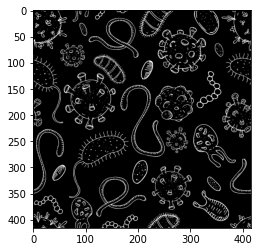

In [36]:
#Imagen a para observar a través del microscopio
obj = cv2.imread('Bacteria.jpg',0)
obj[obj < 15]=0
plt.imshow(obj,"gray")
plt.show()

In [52]:
Wave_l=500*nm
TL_focal_length = 2*mm
def microscopic(obj,radio,dx,TL_focal_length,Wave_l):
    M,N =np.shape(obj)
    dx=1/(1*dx)
    dfx=1/dx
    fx = 1/Wave_l*TL_focal_length
    sal=np.zeros((M,N),dtype="uint8")
    radio = radio
    y =int((M)/(radio*dx))
    x =int((N)/(radio*dx))
    c = 0
    for j in range (0,x+1):
        for i in range(0,y+1):
            mask=np.zeros((M,N),dtype="uint8")
            cv2.circle(mask,(int(j*radio*dx*1.4),int(i*radio*dx*1.4)),int(radio*dx),1,-1)

            mask1=np.zeros((M,N),dtype="uint8")
            cv2.circle(mask1,(int(N/2),int(M/2)),int((fx/radio*dfx)),1,-1)
            
            sec = obj*mask
            sec1 = (np.abs(IFFT(FFT(sec)*(mask1))))
            sal = sal+ sec1
        
    return sal
    

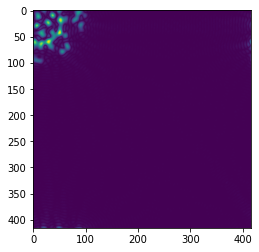

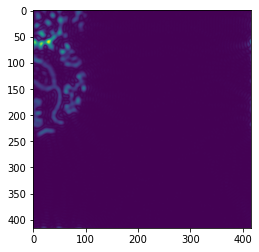

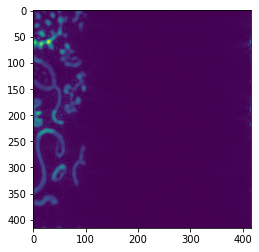

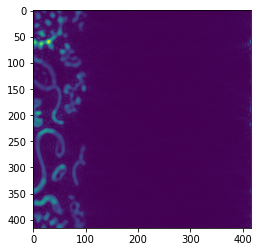

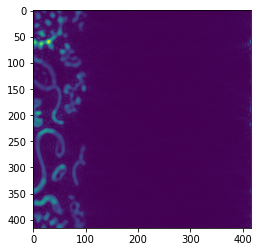

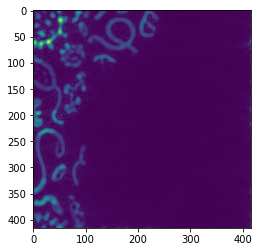

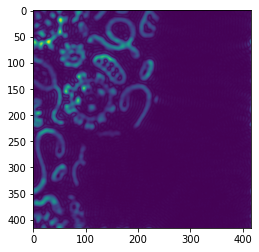

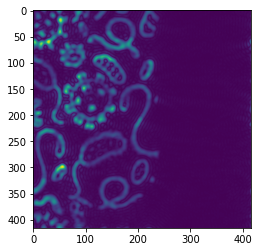

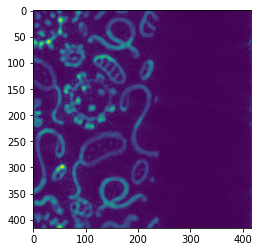

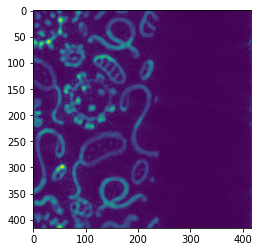

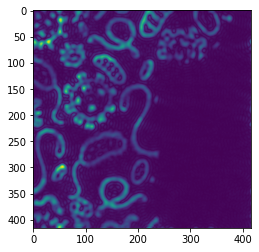

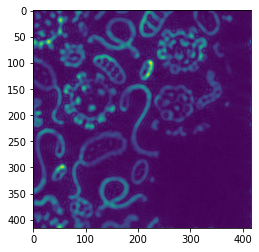

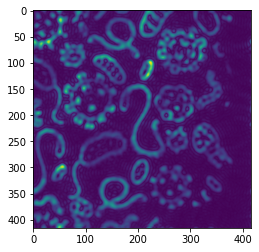

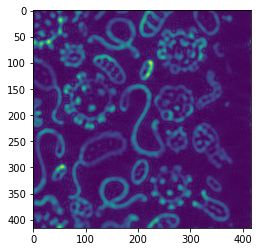

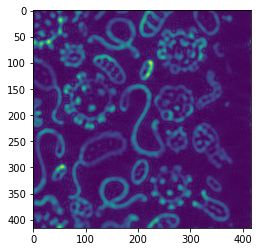

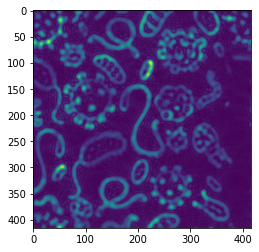

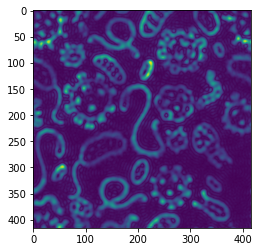

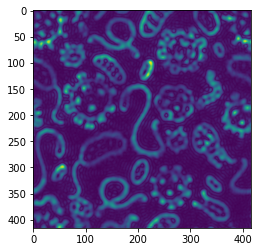

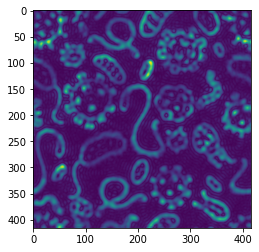

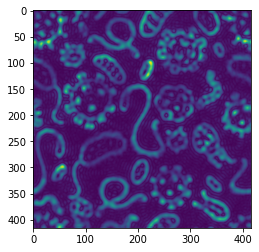

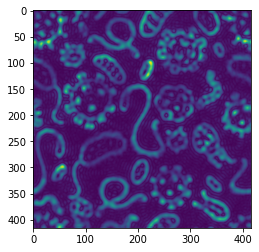

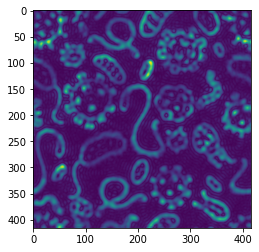

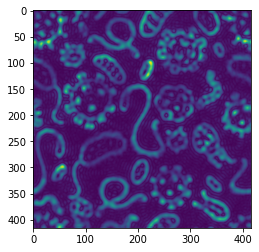

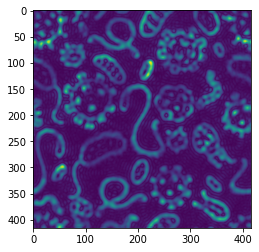

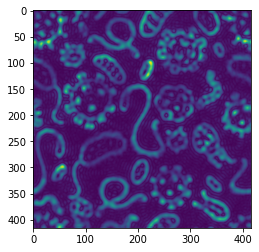

In [68]:
M,N =np.shape(obj)
dx= 1/(1*nm)
dfx=1/dx
fx = 1/Wave_l*TL_focal_length
sal=np.zeros((M,N),dtype="uint8")
radio = 100*nm
y =int((M)/(radio*dx))
x =int((N)/(radio*dx))
c = 0
for j in range (0,x+1):
    for i in range(0,y+1):
        mask=np.zeros((M,N),dtype="uint8")
        cv2.circle(mask,(int(j*radio*dx*1.4),int(i*radio*dx*1.4)),int(radio*dx),1,-1)

        mask1=np.zeros((M,N),dtype="uint8")
        cv2.circle(mask1,(int(N/2),int(M/2)),int((fx/radio*dfx)),1,-1)
        
        sec = obj*mask
        sec1 = (np.abs(IFFT(FFT(sec)*(mask1))))
        sal = sal+ sec1
        plt.imshow(sal)
        plt.show()

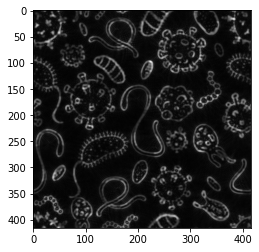

In [53]:
plt.imshow(microscopic(obj,50*nm,1*nm,2*mm,500*nm),"gray")
plt.show()

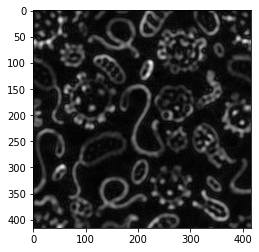

In [37]:
plt.imshow(microscopic(obj,100*nm,1*nm,2*mm,500*nm),"gray")
plt.show()

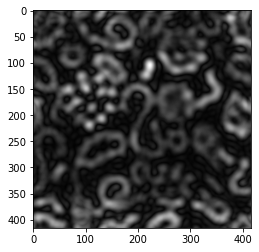

In [8]:
plt.imshow(microscopic(obj,200*nm,1*nm,2*mm,500*nm),"gray")
plt.show()

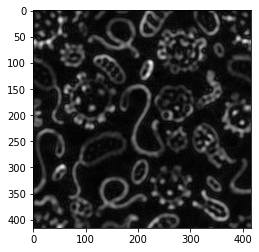

In [14]:
plt.imshow(microscopic(obj,200*nm,2*nm,2*mm,500*nm),"gray")
plt.show()

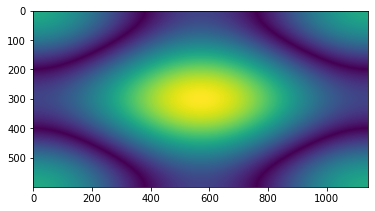

In [29]:
dx=1/(2*nm)
fx=1/dx
M,N =np.shape(obj)
radio1 =200*nm
mask=np.zeros((M,N),dtype="uint8")
cv2.circle(mask,(int(N/2),int(M/2)),int(1),1,-1)
plt.imshow(np.abs(FFT(mask)))
plt.show()


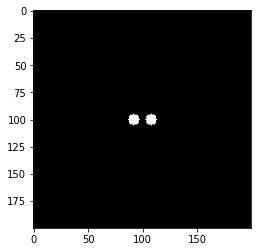

In [270]:
#Imagen a para observar a través del microscopio
im = np.zeros((200, 200),dtype="uint8")
cv2.circle(im,(int(100)+8,int(100)),5,1,-1)
cv2.circle(im,(int(100)-8,int(100)),5,1,-1)
plt.imshow(im, 'gray')
plt.show()
#mask = np.zeros((200, 200),dtype="uint8")
#cv2.circle(mask,(int(200/2),int(200/2)),5,1,-1)

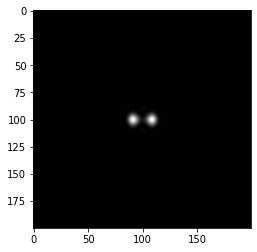

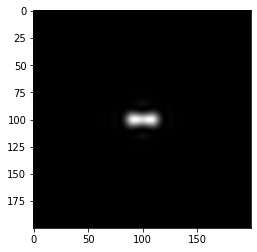

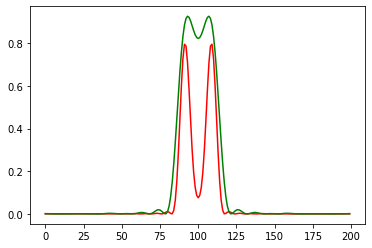

In [268]:
%matplotlib inline
mask = np.zeros((200, 200),dtype="uint8")
cv2.circle(mask,(int(200/2),int(200/2)),14,1,-1)
mask1 = np.zeros((200, 200),dtype="uint8")
cv2.circle(mask1,(int(200/2),int(200/2)),10,1,-1)
a=abs(IFFT(FFT(im)*mask))**2
b=abs(IFFT(FFT(im)*mask1))**2*4
plt.imshow(np.abs(a),"gray")
plt.show()
plt.imshow(np.abs(b),"gray")
plt.show()
plt.plot(np.arange(np.shape(a)[0]), a[100,:],"r")
plt.plot(np.arange(np.shape(b)[0]), b[100,:],"g")
plt.show()